# <center>COVID-19 Analysis: Data Insights with Python<center>

## <center>INTRODUCTION<center>

### PROJECT OVERVIEW
- ***Introduction to the Project:*** This project aims to analyze COVID-19 data using Python to understand the spread and impact of the virus.
- ***Description of the Analysis:*** The analysis will provide insights into COVID-19 cases, deaths, vaccinations and recovery rates by region, demographics, and time.
- ***Importance of Data Analysis & Visualization:*** Utilizing Python and its frameworks for data analysis and visualization enables comprehending of complex COVID-19 data more easily, facilitating informed decision-making and public health interventions.
- ***Tools and Technologies Used:*** The project utilizes Python libraries such as Pandas, Numpy, Matplotlib, and Seaborn for data manipulation and visualization.
- ***Timeline and Scope:*** The project will analyze COVID-19 data for the period starting from the outbreak in 2020 to the present, focusing on key metrics, trends, and patterns in the spread and impact of the virus.

### GOALS AND OBJECTIVES
- ***Analytical Goals:*** The primary objective is to analyze COVID-19 spread and impact across regions, demographics, and time, aiming to identify patterns, hotspots, and areas for targeted interventions.
- ***Key Metrics and KPIs:*** Key metrics such as total confirmed cases, deaths, and recoveries, as well as trends over time and demographic breakdowns, will be visualized to track the progression of the pandemic and assess the effectiveness of containment measures.
- ***Visualization Features***: The visualization allows public health officials and policymakers to analyze specific regions and demographic groups, view daily, weekly, and monthly trends, and identify areas with increasing or decreasing infection rates.
- ***Data Exploration Goals***: Exploring historical COVID-19 data will help uncover patterns in virus spread, identify high-risk populations, and evaluate the impact of interventions such as lockdowns and vaccination campaigns.

## <center>DATA SOURCING & INTEGRATION<center>

### SOURCE DATASET UTILIZED
- ***Source Format:*** The source dataset is in the format of CSV file.
- ***Dataset Details:*** This project analyzes the covid 19 trend and several other factors associated with it.

### LOADING THE DATASET
- ***Loading the Data from Source:*** The dataset is loaded as Pandas Dataframe in which EDA is performed and meaningful visualizations are made.

In [1]:
# Importing the required Python Libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
#Importing the CSV dataset as Pandas dataframe and viewing the columns

df = pd.read_csv('C:/Users/navee/Downloads/Naveen/ML/CSV/CSV Files/owid-covid-data.csv')
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

## <center>DATA CLEANING AND PREPROCESSING<center>

### DATA TRANSFORMATION
- ***Dimensionality Reduction:*** The dataset contains a large number of columns. Not all of them are used for the purpose of EDA and visualization. Therefore, only the necessary columns are determined and copied into a new dataframe.
-  ***Data Type Conversion:*** Some columns are not in the expected data type, requiring manual conversion. Here, we are adjusting the data types accordingly.

In [3]:
#Dimensionality Reduction by extracting only the required columns

df1 = df[['date','location','continent','population','new_tests','total_tests','new_cases','total_cases','new_deaths',
          'total_deaths','cardiovasc_death_rate','people_fully_vaccinated']]

#Data Type Conversion

df1['date'] = pd.to_datetime(df1['date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376708 entries, 0 to 376707
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     376708 non-null  datetime64[ns]
 1   location                 376708 non-null  object        
 2   continent                358744 non-null  object        
 3   population               376708 non-null  float64       
 4   new_tests                75403 non-null   float64       
 5   total_tests              79387 non-null   float64       
 6   new_cases                366116 non-null  float64       
 7   total_cases              338085 non-null  float64       
 8   new_deaths               366124 non-null  float64       
 9   total_deaths             316113 non-null  float64       
 10  cardiovasc_death_rate    292373 non-null  float64       
 11  people_fully_vaccinated  75284 non-null   float64       
dtypes: datetime64[ns

### DATA CLEANING
- ***Removing Null Values:*** Null values in dataset can skew analysis results and affect data
visualization. Pandas provides tools to filter out or replace null values. In this case, the
null values were removed since the dataset is huge and doesn’t affect it in a big way.
- ***Removing Duplicate Values:*** Duplicate values in dataset can lead to inaccuracies in analysis
and visualization. Pandas offers features to identify and remove duplicate rows. In this case, there are no duplicates.

In [4]:
#Identifying if there are any duplicates and removing them

df1.duplicated().sum()

0

In [5]:
#Identifying if there are null values and the columns that have them

df1.isnull().sum()

date                            0
location                        0
continent                   17964
population                      0
new_tests                  301305
total_tests                297321
new_cases                   10592
total_cases                 38623
new_deaths                  10584
total_deaths                60595
cardiovasc_death_rate       84335
people_fully_vaccinated    301424
dtype: int64

In [6]:
#Dealing with Null values

df1.fillna(0, inplace=True)

## <center>EDA AND VISUALIZATION<center>

### ANALYSIS
- ***Covid Trend:*** The analysis focuses on various COVID-related factors within the context of India. It delves into trends pertaining to COVID cases, testing rates, and mortality rates.

In [7]:
#Filtering and obtaining required values in India

df2 = df1[['date','new_cases','new_tests', 'new_deaths']].loc[df['location'] == 'India']
df2 = df2.groupby(pd.Grouper(key='date', axis=0, freq='1Q', sort=True)).sum().reset_index()

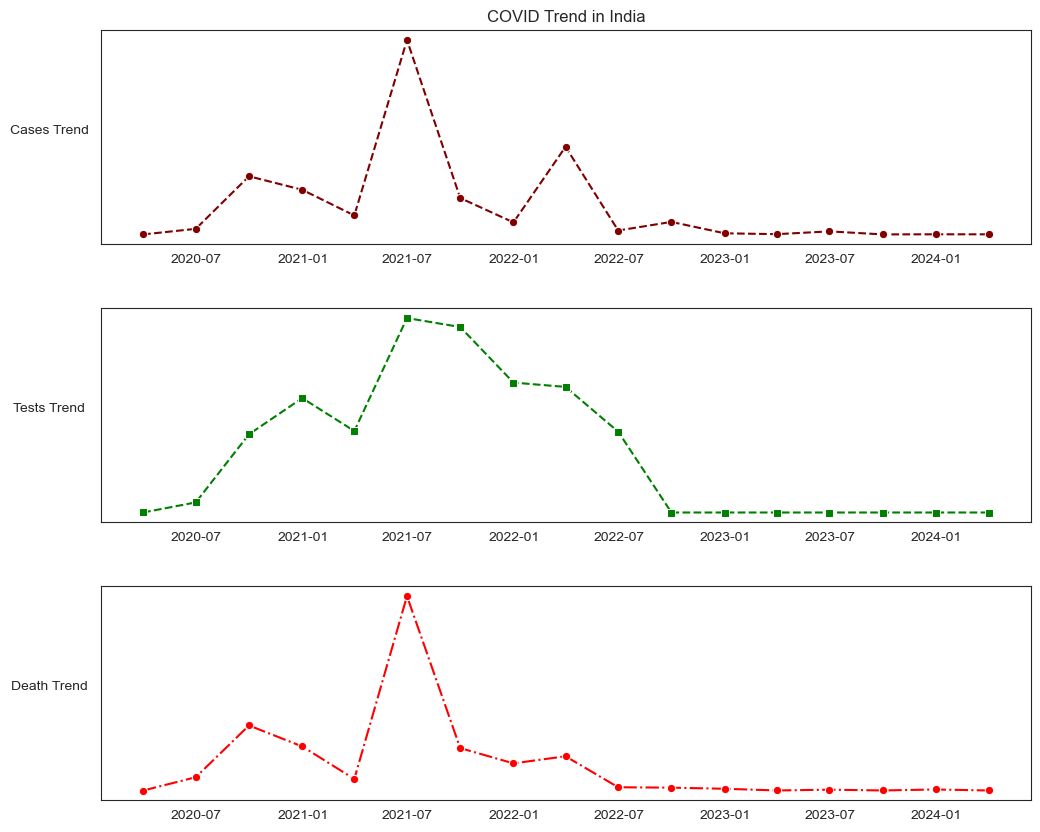

In [8]:
#Plotting Line Chart to view these trends

sns.set_style("white")
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

sns.lineplot(x='date', y='new_cases', data=df2, ax=axs[0],color='maroon', marker='o', linestyle='--')
axs[0].set_title('COVID Trend in India')
axs[0].set_xlabel('')
axs[0].set_ylabel('Cases Trend',rotation=360, labelpad=30)
axs[0].set_yticklabels([])

sns.lineplot(x='date', y='new_tests', data=df2, ax=axs[1], color='green', marker='s', linestyle='--')
axs[1].set_title('')
axs[1].set_xlabel('')
axs[1].set_ylabel('Tests Trend',rotation=360, labelpad=30)
axs[1].set_yticklabels([])

sns.lineplot(x='date', y='new_deaths', data=df2, ax=axs[2], color='red', marker='o', linestyle='-.')
axs[2].set_title('')
axs[2].set_xlabel('')
axs[2].set_ylabel('Death Trend',rotation=360, labelpad=30)
axs[2].set_yticklabels([])

plt.subplots_adjust(hspace=0.3)
plt.show()

- ***Morality Rate Identification:*** Analyzing and Identifying the top countries that have the highest Morality Rates.

In [51]:
#Finding out countries with most mortality rate in % (Per 100k people)

df3 = df.groupby(['location','population'], as_index=False)['total_deaths'].max().sort_values('total_deaths', ascending = False)
df3['population/100k'] = df3['population']/100
df3['deaths/100k'] = df3['total_deaths']/(df3['population']/100)
df3['mortality_rate'] = (df3['deaths/100k']*100).round(2)
df3 = df3.sort_values('mortality_rate',ascending = False).head(10)
df3.head(2)

,location,population,total_deaths,population/100k,deaths/100k,mortality_rate
177,Peru,34049588.0,221583.0,340495.88,0.650766,65.08
33,Bulgaria,6781955.0,38681.0,67819.55,0.570352,57.04


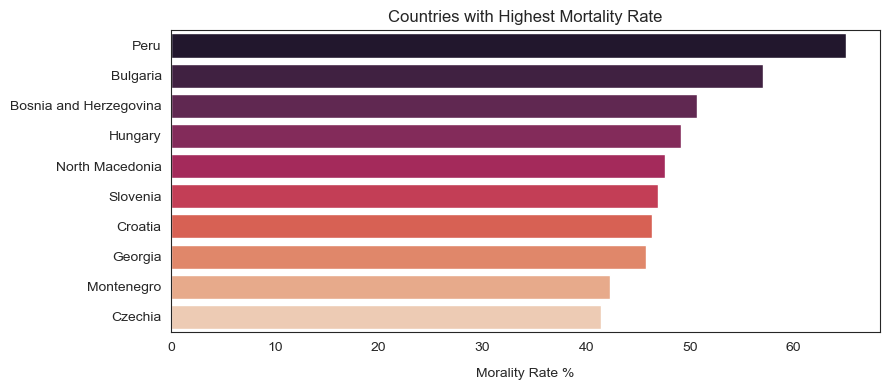

In [52]:
# Plotting the Countries using Bar Chart

plt.figure(figsize=(9, 4))
sns.barplot(x='mortality_rate', y='location', data=df3, palette='rocket')
plt.xlabel('Morality Rate %', labelpad = 10)
plt.ylabel('')
plt.title('Countries with Highest Mortality Rate')
plt.tight_layout()
plt.show()

- ***Vaccination Status Analysis:*** Analyzing the vaccination details of some of the highly populated regions.

In [63]:
#Identifying vaccination percentage of top populated locations

df4 = df.groupby(['location','population'], as_index=False)['people_fully_vaccinated'].max().sort_values('population', ascending = False)
df4['vaccination_percentage'] = (df4['people_fully_vaccinated']/df4['population'])*100
df4.head(10)

,location,population,people_fully_vaccinated,vaccination_percentage
251,World,7.975105e+09,5.176858e+09,64.912730
12,Asia,4.721383e+09,3.461821e+09,73.322174
128,Lower middle income,3.432097e+09,2.052419e+09,59.800721
241,Upper middle income,2.525921e+09,1.990461e+09,78.801389
1,Africa,1.426737e+09,4.623922e+08,32.409080
44,China,1.425887e+09,1.276760e+09,89.541435
101,India,1.417173e+09,9.519883e+08,67.175158
96,High income,1.250515e+09,9.292546e+08,74.309776
70,Europe,7.448078e+08,4.931631e+08,66.213477
127,Low income,7.376049e+08,2.046884e+08,27.750413


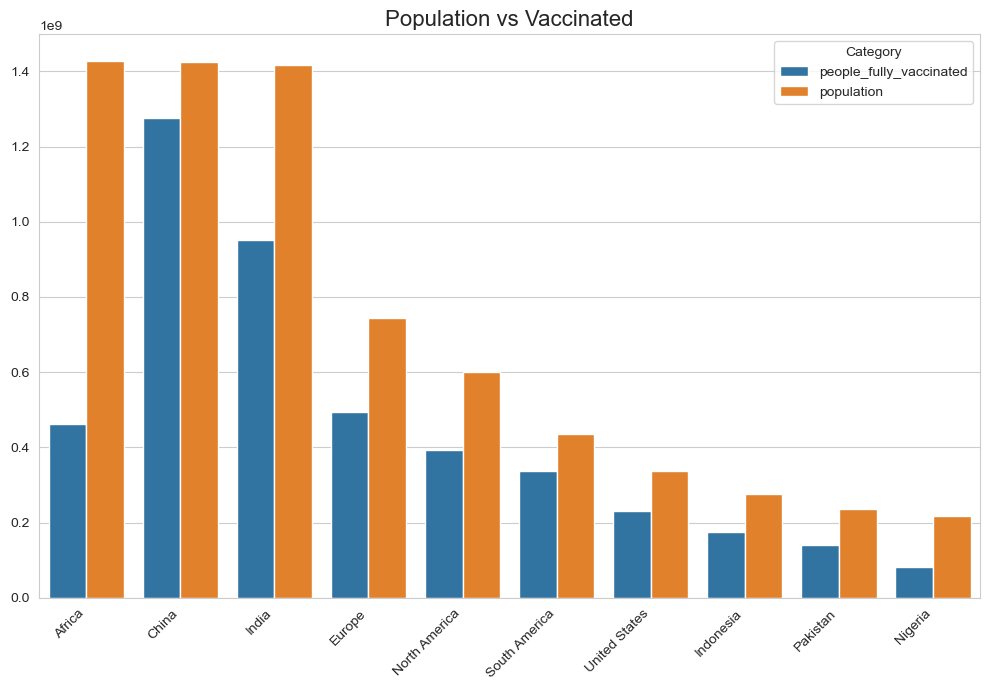

In [54]:
#Taking only the Regions and dropping Continents

df5 = df4.drop([251,12,241,128,96,127,71])
df5 = df5.head(10)

# Plotting a Side by Side Bar chart for the same

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x='location', y='value', hue='variable', data=pd.melt(df5, id_vars='location', value_vars=['people_fully_vaccinated', 'population']), ax=ax)
ax.set_title("Population vs Vaccinated", fontsize=16)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.legend(title="Category")

plt.xticks(rotation=45, ha='right')
ax.xaxis.labelpad = 20

plt.tight_layout()
plt.show()

- ***Morality Likelihood Analysis:*** Identifying the top countries that have the highest morality likelihood if the disease is contracted.

In [35]:
#Countries with higher likelihood of mortality if disease is contracted (in %)

df6 = df.groupby(['location'], as_index=False)[['total_cases','total_deaths']].max().sort_values('total_deaths', ascending = False)
df6['mortality_likelihood'] = (df6['total_deaths']/df6['total_cases'])*100
df6 = df6.sort_values('mortality_likelihood',ascending = False).head(10)
df6.head(2)

,location,total_cases,total_deaths,mortality_likelihood
252,Yemen,11945.0,2159.0,18.074508
216,Sudan,63993.0,5046.0,7.885237


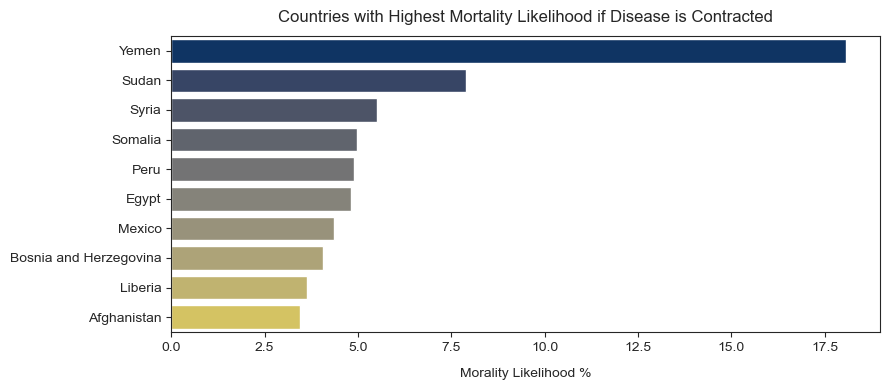

In [38]:
#Plotting those top countries

sns.set_style("ticks")
plt.figure(figsize=(9, 4))
sns.barplot(x='mortality_likelihood', y='location', data=df6, palette='cividis')
plt.xlabel('Morality Likelihood %', labelpad = 10)
plt.ylabel('')
plt.title('Countries with Highest Mortality Likelihood if Disease is Contracted', pad = 10)
plt.tight_layout()
plt.show()

- ***Propotional Analysis by Continents:*** Identifying the proportion of factors such as total deaths, total cases, and total vaccinations across continents.

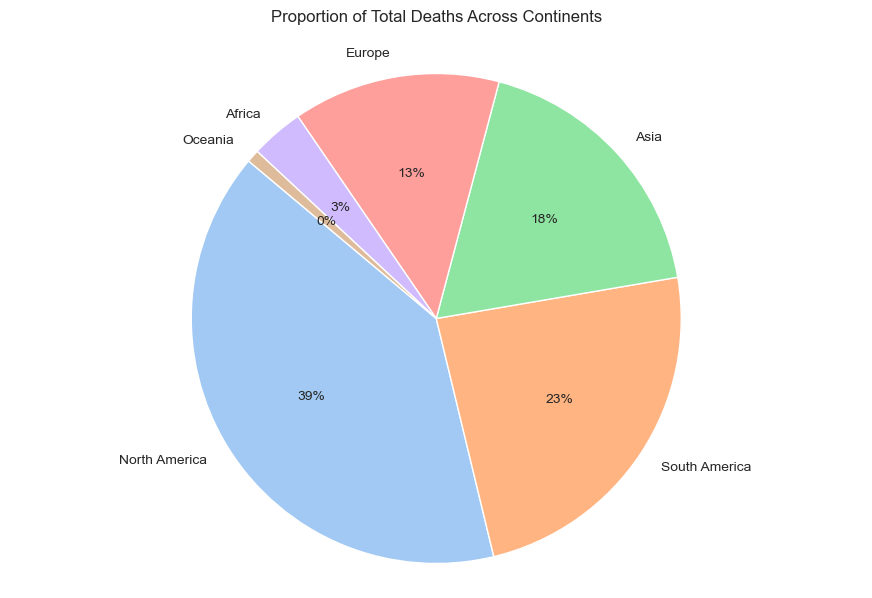

In [59]:
#Extracting the Proper Continent Fields

df7 = df1
valid_continents = ['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']
df7 = df7[df7['continent'].isin(valid_continents)] 

#Visualizing the Proportion of Total Deaths Across Continents using Pie Chart

df8 = df7.groupby(['continent'], as_index=False)['total_deaths'].max().sort_values('total_deaths', ascending = False)

plt.figure(figsize=(11, 7))
sns.set_palette('pastel')
plt.pie(df8['total_deaths'], labels=df8['continent'], autopct='%1i%%', startangle=140)
plt.title('Proportion of Total Deaths Across Continents', pad = 20)
plt.axis('equal')
plt.show()

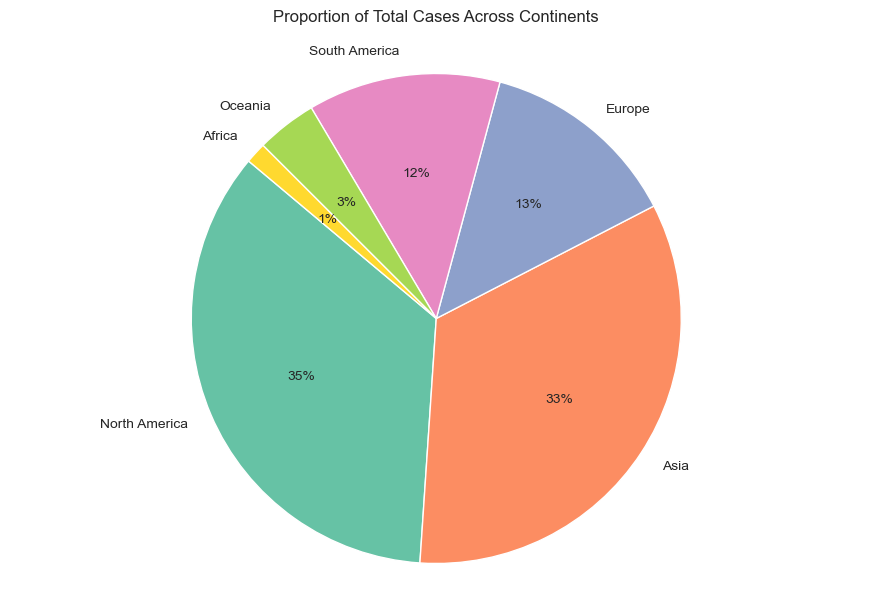

In [60]:
#Visualizing the Proportion of Total cases Across Continents using Pie Chart

df9 = df7.groupby(['continent'], as_index=False)['total_cases'].max().sort_values('total_cases', ascending = False)

plt.figure(figsize=(11, 7))
sns.set_palette('Set2')
plt.pie(df9['total_cases'], labels=df9['continent'], autopct='%1i%%', startangle=140)
plt.title('Proportion of Total Cases Across Continents', pad = 20)
plt.axis('equal')
plt.show()

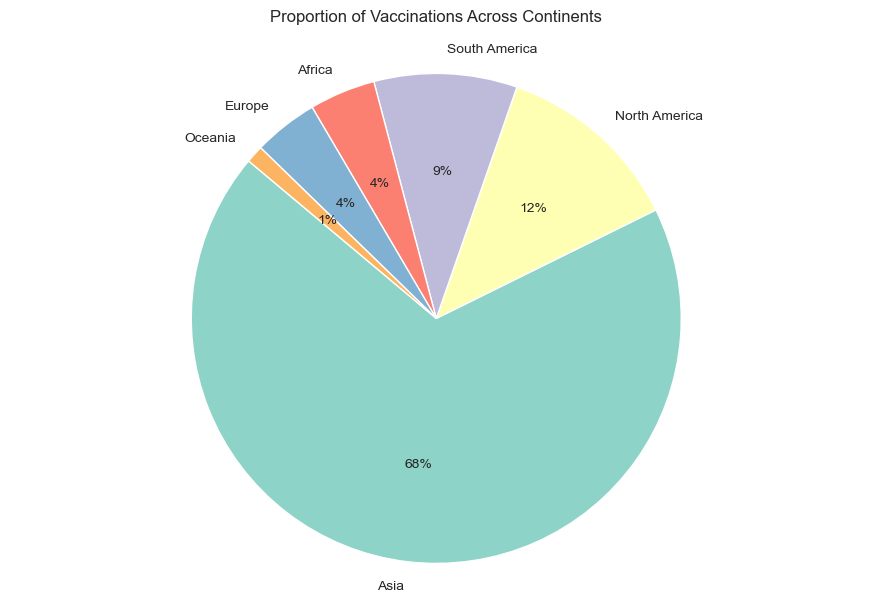

In [61]:
#Visualizing the Proportion of Vaccinations Across Continents with a Pie Chart.

df10 = df7.groupby(['continent'], as_index=False)['people_fully_vaccinated'].max().sort_values('people_fully_vaccinated', ascending = False)

plt.figure(figsize=(11, 7))
sns.set_palette('Set3')
plt.pie(df10['people_fully_vaccinated'], labels=df10['continent'], autopct='%1i%%', startangle=140)
plt.title('Proportion of Vaccinations Across Continents', pad = 20)
plt.axis('equal')
plt.show()

## <center>RESULTS AND CONCLUSION<center>

### FINDINGS AND KEY INSIGHTS

***Covid Trends in India:***
- The pinnacle of Covid testing, case occurrence, and fatalities was witnessed in mid-2021 in India.
- By the latter part of the first half of 2022, the trajectory of cases, testing, and Covid-related fatalities began to decline, marking a continuous decrease thereafter.

***Global Mortality Rates:***
- Peru recorded the highest mortality rate at 65%, trailed closely by Bulgaria at 57%.
- Yemen and Sudan top the charts with mortality rates of 18% and 8%, respectively, if the disease is contracted.

***Global Vaccination Disparities Across Income Strata:***
- Across the globe, vaccination coverage stands at 60% for lower-middle-income individuals and surges to 79% for their upper-middle-income counterparts.
- High-income brackets demonstrate a robust vaccination rate of 74%, while only 27% of individuals from low-income backgrounds have received vaccinations.

***Vaccination Status by Population and Continent:***
- The preeminent nations by population—India, China, and the USA—boast vaccination rates of 67%, 90%, and 68%, respectively.
- Asia, Africa, and Europe, the most populous continents, exhibit vaccination rates of 73%, 32%, and 66%, respectively.
- Globally, the vaccination campaign has achieved a commendable 64% coverage.

***Regional Covid Impact: Mortality, Incidence, and Vaccination Efforts:***
- North America and South America account for 39% and 23% of total Covid-related fatalities, respectively.
- In terms of recorded Covid cases, North America and Asia take the lead with shares of 35% and 33%, respectively.
- Asia leads in global Covid vaccinations, contributing 68%, followed by North America with 12%.

### LIMITATIONS
***Visualization Constraints:*** While libraries like Matplotlib and Seaborn offer diverse visualization options, complex visualizations may require additional customization or integration with other tools.
    
### CONCLUSION
In conclusion, the analysis reveals significant trends in Covid testing, cases, and fatalities, with India experiencing a peak in mid-2021 followed by a decline from the latter part of the first half of 2022. Globally, mortality rates varied, with Peru and Bulgaria reporting the highest rates. Vaccination coverage showed disparities across income levels, with high-income brackets displaying higher rates compared to lower-income groups. Populous countries like India, China, and the USA exhibited varying vaccination rates, while Asia emerged as the leading contributor to global vaccinations. Regional analysis highlighted the disproportionate impact of Covid, particularly in North and South America. Overall, the findings underscore the need for continued vigilance and equitable distribution of vaccines to mitigate the impact of the pandemic.